In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

#Mining the Social Web, 2nd Edition

##Chapter 7: Mining GitHub: Inspecting Software Collaboration Habits, Building Interest Graphs, and More

This IPython Notebook provides an interactive way to follow along with and explore the numbered examples from [_Mining the Social Web (2nd Edition)_](http://bit.ly/135dHfs). The intent behind this notebook is to reinforce the concepts from the sample code in a fun, convenient, and effective way. This notebook assumes that you are reading along with the book and have the context of the discussion as you work through these exercises.

In the somewhat unlikely event that you've somehow stumbled across this notebook outside of its context on GitHub, [you can find the full source code repository here](http://bit.ly/16kGNyb).

## Copyright and Licensing

You are free to use or adapt this notebook for any purpose you'd like. However, please respect the [Simplified BSD License](https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition/blob/master/LICENSE.txt) that governs its use.

## Example 1. Programmatically obtaining a personal API access token for accessing GitHub's API

In [2]:
import requests
from getpass import getpass
import json

username = '' # Your GitHub username
password = '' # Your GitHub password

# Note that credentials will be transmitted over a secure SSL connection
url = 'https://api.github.com/authorizations'
note = 'Mining the Social Web, 2nd Ed.'
post_data = {'scopes':['repo'],'note': note }

response = requests.post(
    url,
    auth = (username, password),
    data = json.dumps(post_data),
    )   

print "API response:", response.text
print
print "Your OAuth token is", response.json()['token']

# Go to https://github.com/settings/applications to revoke this token

 API response: {"message":"Bad credentials","documentation_url":"https://developer.github.com/v3"}

Your OAuth token is

KeyError: 'token'

## Example 2. Making direct HTTP requests to GitHub's API

In [ ]:
import json
import requests

# An unauthenticated request that doesn't contain an ?access_token=xxx query string
url = "https://api.github.com/repos/ptwobrussell/Mining-the-Social-Web/stargazers"
response = requests.get(url)

# Display one stargazer

print json.dumps(response.json()[0], indent=1)
print

# Display headers
for (k,v) in response.headers.items():
    print k, "=>", v

## Example 3. Using PyGithub to query for stargazers of a particular repository

In [6]:
from github import Github

# XXX: Specify your own access token here

ACCESS_TOKEN = '31ecdab1c572a467b88b19d670e09aed9c431fa4'

# Specify a username and repository of interest for that user.

USER = 'ptwobrussell'
REPO = 'Mining-the-Social-Web'

client = Github(ACCESS_TOKEN, per_page=100)
user = client.get_user(USER)
repo = user.get_repo(REPO)

# Get a list of people who have bookmarked the repo.
# Since you'll get a lazy iterator back, you have to traverse
# it if you want to get the total number of stargazers.

stargazers = [ s for s in repo.get_stargazers() ]
print "Number of stargazers", len(stargazers)

 Number of stargazers 1072


## Example 4. Constructing a trivial property graph

In [7]:
import networkx as nx

# Create a directed graph

g = nx.DiGraph()

# Add an edge to the directed graph from X to Y

g.add_edge('X', 'Y')

# Print some statistics about the graph

print nx.info(g)
print

# Get the nodes and edges from the graph

print "Nodes:", g.nodes()
print "Edges:", g.edges()
print

# Get node properties

print "X props:", g.node['X']
print "Y props:", g.node['Y']

# Get edge properties

print "X=>Y props:", g['X']['Y']
print

# Update a node property

g.node['X'].update({'prop1' : 'value1'})
print "X props:", g.node['X']
print

# Update an edge property

g['X']['Y'].update({'label' : 'label1'})
print "X=>Y props:", g['X']['Y']

Name: 
Type: DiGraph
Number of nodes: 2
Number of edges: 1
Average in degree:   0.5000
Average out degree:   0.5000

Nodes: ['Y', 'X']
Edges: [('X', 'Y')]

X props: {}
Y props: {}
X=>Y props: {}

X props: {'prop1': 'value1'}

X=>Y props: {'label': 'label1'}


## Example 5. Constructing an ego graph of a repository and its stargazers

In [8]:
# Expand the initial graph with (interest) edges pointing each direction for 
# additional people interested. Take care to ensure that user and repo nodes 
# do not collide by appending their type.

import networkx as nx

g = nx.DiGraph()
g.add_node(repo.name + '(repo)', type='repo', lang=repo.language, owner=user.login)

for sg in stargazers:
    g.add_node(sg.login + '(user)', type='user')
    g.add_edge(sg.login + '(user)', repo.name + '(repo)', type='gazes')

## Example 6. Introducing some handy graph operations

In [9]:
# Poke around in the current graph to get a better feel for how NetworkX works

print nx.info(g)
print
print g.node['Mining-the-Social-Web(repo)']
print g.node['ptwobrussell(user)']
print
print g['ptwobrussell(user)']['Mining-the-Social-Web(repo)']
# The next line would throw a KeyError since no such edge exists:
# print g['Mining-the-Social-Web(repo)']['ptwobrussell(user)']
print
print g['ptwobrussell(user)']
print g['Mining-the-Social-Web(repo)']
print
print g.in_edges(['ptwobrussell(user)'])
print g.out_edges(['ptwobrussell(user)'])
print
print g.in_edges(['Mining-the-Social-Web(repo)'])
print g.out_edges(['Mining-the-Social-Web(repo)'])

Name: 
Type: DiGraph
Number of nodes: 1073
Number of edges: 1072
Average in degree:   0.9991
Average out degree:   0.9991

{'lang': u'JavaScript', 'owner': u'ptwobrussell', 'type': 'repo'}
{'type': 'user'}

{'type': 'gazes'}

{u'Mining-the-Social-Web(repo)': {'type': 'gazes'}}
{}

[]
[('ptwobrussell(user)', u'Mining-the-Social-Web(repo)')]

[(u'yobo000(user)', 'Mining-the-Social-Web(repo)'), (u'gregmoreno(user)', 'Mining-the-Social-Web(repo)'), (u'SathishRaju(user)', 'Mining-the-Social-Web(repo)'), (u'beinvest(user)', 'Mining-the-Social-Web(repo)'), (u'gawry(user)', 'Mining-the-Social-Web(repo)'), (u'decadef20(user)', 'Mining-the-Social-Web(repo)'), (u'darkfall(user)', 'Mining-the-Social-Web(repo)'), (u'daimajia(user)', 'Mining-the-Social-Web(repo)'), (u'phauly(user)', 'Mining-the-Social-Web(repo)'), (u'henri-nourel(user)', 'Mining-the-Social-Web(repo)'), (u'chihuanqi(user)', 'Mining-the-Social-Web(repo)'), (u'program247365(user)', 'Mining-the-Social-Web(repo)'), (u'xiaodiu2010(user)',

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


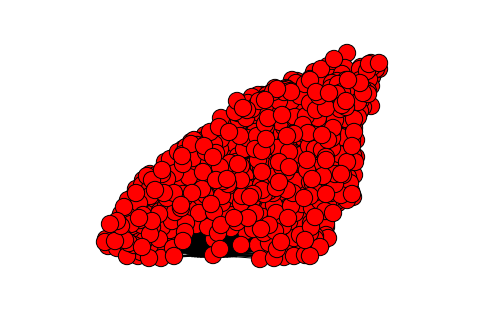

In [13]:
plt.figure(figsize=(6,4));
nx.draw(g)

## Example 7. Calculating degree, betweenness, and closeness centrality measures on the Krackhardt kite graph

In [10]:
from operator import itemgetter
from IPython.display import HTML
from IPython.core.display import display

display(HTML('<img src="files/resources/ch07-github/kite-graph.png" width="400px">'))

# The classic Krackhardt kite graph
kkg = nx.generators.small.krackhardt_kite_graph()

print "Degree Centrality"
print sorted(nx.degree_centrality(kkg).items(), 
             key=itemgetter(1), reverse=True)
print

print "Betweenness Centrality"
print sorted(nx.betweenness_centrality(kkg).items(), 
             key=itemgetter(1), reverse=True)
print

print "Closeness Centrality"
print sorted(nx.closeness_centrality(kkg).items(), 
             key=itemgetter(1), reverse=True)

Degree Centrality
[(3, 0.6666666666666666), (5, 0.5555555555555556), (6, 0.5555555555555556), (0, 0.4444444444444444), (1, 0.4444444444444444), (2, 0.3333333333333333), (4, 0.3333333333333333), (7, 0.3333333333333333), (8, 0.2222222222222222), (9, 0.1111111111111111)]

Betweenness Centrality
[(7, 0.38888888888888884), (5, 0.23148148148148148), (6, 0.23148148148148148), (8, 0.2222222222222222), (3, 0.10185185185185183), (0, 0.023148148148148143), (1, 0.023148148148148143), (2, 0.0), (4, 0.0), (9, 0.0)]

Closeness Centrality
[(5, 0.6428571428571429), (6, 0.6428571428571429), (3, 0.6), (7, 0.6), (0, 0.5294117647058824), (1, 0.5294117647058824), (2, 0.5), (4, 0.5), (8, 0.42857142857142855), (9, 0.3103448275862069)]


## Example 8. Adding additional interest edges to the graph through the inclusion of "follows" edges

In [11]:
# Add (social) edges from the stargazers' followers. This can take a while 
# because of all of the potential API calls to GitHub. The approximate number
# of requests for followers for each iteration of this loop can be calculated as
# math.ceil(sg.get_followers() / 100.0) per the API returning up to 100 items
# at a time.

import sys

for i, sg in enumerate(stargazers):
    
    # Add "follows" edges between stargazers in the graph if any relationships exist
    try:
        for follower in sg.get_followers():
            if follower.login + '(user)' in g:
                g.add_edge(follower.login + '(user)', sg.login + '(user)', 
                           type='follows')
    except Exception, e: #ssl.SSLError
        print >> sys.stderr, "Encountered an error fetching followers for", \
                             sg.login, "Skipping."
        print >> sys.stderr, e

    print "Processed", i+1, " stargazers. Num nodes/edges in graph", \
          g.number_of_nodes(), "/", g.number_of_edges()
    print "Rate limit remaining", client.rate_limiting

Processed 1  stargazers. Num nodes/edges in graph 1073 / 1075
Rate limit remaining (4986, 5000)
Processed 2  stargazers. Num nodes/edges in graph 1073 / 1079
Rate limit remaining (4985, 5000)
Processed 3  stargazers. Num nodes/edges in graph 1073 / 1081
Rate limit remaining (4984, 5000)
Processed 4  stargazers. Num nodes/edges in graph 1073 / 1087
Rate limit remaining (4982, 5000)
Processed 5  stargazers. Num nodes/edges in graph 1073 / 1088
Rate limit remaining (4981, 5000)
Processed 6  stargazers. Num nodes/edges in graph 1073 / 1091
Rate limit remaining (4980, 5000)
Processed 7  stargazers. Num nodes/edges in graph 1073 / 1092
Rate limit remaining (4979, 5000)
Processed 8  stargazers. Num nodes/edges in graph 1073 / 1096
Rate limit remaining (4977, 5000)
Processed 9  stargazers. Num nodes/edges in graph 1073 / 1107
Rate limit remaining (4973, 5000)
Processed 10  stargazers. Num nodes/edges in graph 1073 / 1110
Rate limit remaining (4972, 5000)
Processed 11  stargazers. Num nodes/edg

## Example 9. Exploring the updated graph's "follows" edges

In [14]:
from operator import itemgetter
from collections import Counter

# Let's see how many social edges we added since last time.
print nx.info(g)
print

# The number of "follows" edges is the difference
print len([e for e in g.edges_iter(data=True) if e[2]['type'] == 'follows'])
print

# The repository owner is possibly one of the more popular users in this graph.
print len([e 
           for e in g.edges_iter(data=True) 
               if e[2]['type'] == 'follows' and e[1] == 'ptwobrussell(user)'])
print

# Let's examine the number of adjacent edges to each node
print sorted([n for n in g.degree_iter()], key=itemgetter(1), reverse=True)[:10]
print

# Consider the ratio of incoming and outgoing edges for a couple of users with 
# high node degrees...

# A user who follows many but is not followed back by many.

print len(g.out_edges('hcilab(user)'))
print len(g.in_edges('hcilab(user)'))
print

# A user who is followed by many but does not follow back.

print len(g.out_edges('ptwobrussell(user)'))
print len(g.in_edges('ptwobrussell(user)'))
print

c = Counter([e[1] for e in g.edges_iter(data=True) if e[2]['type'] == 'follows'])
popular_users = [ (u, f) for (u, f) in c.most_common() if f > 1 ]
print "Number of popular users", len(popular_users)
print "Top 10 popular users:", popular_users[:10]

Name: 
Type: DiGraph
Number of nodes: 1073
Number of edges: 2800
Average in degree:   2.6095
Average out degree:   2.6095

1728

121

[(u'Mining-the-Social-Web(repo)', 1072), (u'angusshire(user)', 502), (u'ternsip(user)', 302), (u'kennethreitz(user)', 139), (u'ptwobrussell(user)', 122), (u'VagrantStory(user)', 103), (u'trietptm(user)', 69), (u'mcanthony(user)', 37), (u'daimajia(user)', 34), (u'JT5D(user)', 32)]

0
0

1
121

Number of popular users 393
Top 10 popular users: [(u'kennethreitz(user)', 136), (u'ptwobrussell(user)', 121), (u'daimajia(user)', 30), (u'hammer(user)', 20), (u'jkbrzt(user)', 19), (u'isnowfy(user)', 18), (u'japerk(user)', 18), (u'angusshire(user)', 12), (u'tswicegood(user)', 11), (u'ZoomQuiet(user)', 10)]


## Example 10. Snapshotting (pickling) the graph's state to disk

In [17]:
# Save your work by serializing out (pickling) the graph
nx.write_gpickle(g, "github.gpickle.1")

# How to restore the graph...
# import networkx as nx
# g = nx.read_gpickle("resources/ch07-github/data/github.gpickle.1")

## Example 11. Applying centrality measures to the interest graph

In [18]:
from operator import itemgetter

# Create a copy of the graph so that we can iteratively mutate the copy
# as needed for experimentation

h = g.copy()

# Remove the seed of the interest graph, which is a supernode, in order
# to get a better idea of the network dynamics

h.remove_node('Mining-the-Social-Web(repo)')

# XXX: Remove any other nodes that appear to be supernodes.
# Filter any other nodes that you can by threshold
# criteria or heuristics from inspection.

# Display the centrality measures for the top 10 nodes


dc = sorted(nx.degree_centrality(h).items(), 
            key=itemgetter(1), reverse=True)

print "Degree Centrality"
print dc[:10]
print

bc = sorted(nx.betweenness_centrality(h).items(), 
            key=itemgetter(1), reverse=True)

print "Betweenness Centrality"
print bc[:10]
print

print "Closeness Centrality"
cc = sorted(nx.closeness_centrality(h).items(), 
            key=itemgetter(1), reverse=True)
print cc[:10]

Degree Centrality
[(u'angusshire(user)', 0.4677871148459384), (u'ternsip(user)', 0.28104575163398693), (u'kennethreitz(user)', 0.1288515406162465), (u'ptwobrussell(user)', 0.11297852474323063), (u'VagrantStory(user)', 0.09523809523809525), (u'trietptm(user)', 0.06349206349206349), (u'mcanthony(user)', 0.03361344537815126), (u'daimajia(user)', 0.03081232492997199), (u'JT5D(user)', 0.028944911297852476), (u'hammer(user)', 0.02334267040149393)]

Betweenness Centrality
[(u'angusshire(user)', 0.012091000080807624), (u'trietptm(user)', 0.006552205024169214), (u'neriberto(user)', 0.0054023678795526945), (u'krmaxwell(user)', 0.004967387785851621), (u'evandrix(user)', 0.0024926100440877375), (u'miku(user)', 0.001463389093955339), (u'mcanthony(user)', 0.0010143897169882165), (u'matagus(user)', 0.0010039966142220127), (u'JT5D(user)', 0.0006518417902370376), (u'ternsip(user)', 0.0006138557829009442)]

Closeness Centrality
[(u'angusshire(user)', 0.4665079904794288), (u'ternsip(user)', 0.36069668090

## Example 12. Adding starred repositories to the graph

In [19]:
# Let's add each stargazer's additional starred repos and add edges 
# to find additional interests.

MAX_REPOS = 500

for i, sg in enumerate(stargazers):
    print sg.login
    try:
        for starred in sg.get_starred()[:MAX_REPOS]: # Slice to avoid supernodes
            g.add_node(starred.name + '(repo)', type='repo', lang=starred.language, \
                       owner=starred.owner.login)
            g.add_edge(sg.login + '(user)', starred.name + '(repo)', type='gazes')
    except Exception, e: #ssl.SSLError:
        print "Encountered an error fetching starred repos for", sg.login, "Skipping."

    print "Processed", i+1, "stargazers' starred repos"
    print "Num nodes/edges in graph", g.number_of_nodes(), "/", g.number_of_edges()
    print "Rate limit", client.rate_limiting

rdempsey
Processed 1 stargazers' starred repos
Num nodes/edges in graph 1457 / 3184
Rate limit (3467, 5000)
frac
Processed 2 stargazers' starred repos
Num nodes/edges in graph 1571 / 3303
Rate limit (3465, 5000)
prb
Processed 3 stargazers' starred repos
Num nodes/edges in graph 1752 / 3489
Rate limit (3463, 5000)
mcroydon
Processed 4 stargazers' starred repos
Num nodes/edges in graph 2244 / 3987
Rate limit (3458, 5000)
batasrki
Processed 5 stargazers' starred repos
Num nodes/edges in graph 2290 / 4038
Rate limit (3457, 5000)
twleung
Processed 6 stargazers' starred repos
Num nodes/edges in graph 2765 / 4535
Rate limit (3452, 5000)
kevinchiu
Processed 7 stargazers' starred repos
Num nodes/edges in graph 3094 / 4912
Rate limit (3448, 5000)
nikolay
Processed 8 stargazers' starred repos
Num nodes/edges in graph 3582 / 5409
Rate limit (3443, 5000)
tswicegood
Processed 9 stargazers' starred repos
Num nodes/edges in graph 4021 / 5889
Rate limit (3438, 5000)
ngpestelos
Processed 10 stargazers' 

**NOTE: Given that Example 12 is potentially a very time-consuming example to run, be sure to snapshot your work**

In [20]:
# Save your work by serializing out another snapshot of the graph
nx.write_gpickle(g, "github.gpickle.2")

#import networkx as nx
#g = nx.read_gpickle("resources/ch07-github/data/github.gpickle.2")

Consider analysis similar to _Example 12_ here. Create a copy of the graph and be selective in pruning it or extracting subgraphs of interst.

In [25]:
#nx.write_gexf(g, "github2.gexf")
#nx.write_gml(g, "github2.gml")

from networkx.readwrite import json_graph
data = json_graph.node_link_data(g)
with open('graph.json', 'w') as f:
    json.dump(data, f, indent=4)

In [27]:
%%javascript
// We load the d3.js library from the Web.
require.config({paths: {d3: "http://d3js.org/d3.v3.min"}});
require(["d3"], function(d3) {
    // The code in this block is executed when the 
    // d3.js library has been loaded.
    
    // First, we specify the size of the canvas containing
    // the visualization (size of the <div> element).
    var width = 300,
        height = 300;

    // We create a color scale.
    var color = d3.scale.category10();

    // We create a force-directed dynamic graph layout.
    var force = d3.layout.force()
        .charge(-120)
        .linkDistance(30)
        .size([width, height]);

    // In the <div> element, we create a <svg> graphic
    // that will contain our interactive visualization.
    var svg = d3.select("#d3-example").select("svg")
    if (svg.empty()) {
        svg = d3.select("#d3-example").append("svg")
                    .attr("width", width)
                    .attr("height", height);
    }
        
    // We load the JSON file.
    d3.json("graph.json", function(error, graph) {
        // In this block, the file has been loaded
        // and the 'graph' object contains our graph.
        
        // We load the nodes and links in the force-directed
        // graph.
        force.nodes(graph.nodes)
            .links(graph.links)
            .start();

        // We create a <line> SVG element for each link
        // in the graph.
        var link = svg.selectAll(".link")
            .data(graph.links)
            .enter().append("line")
            .attr("class", "link");

        // We create a <circle> SVG element for each node
        // in the graph, and we specify a few attributes.
        var node = svg.selectAll(".node")
            .data(graph.nodes)
            .enter().append("circle")
            .attr("class", "node")
            .attr("r", 5)  // radius
            .style("fill", function(d) {
                // The node color depends on the club.
                return color(d.club); 
            })
            .call(force.drag);

        // The name of each node is the node number.
        node.append("title")
            .text(function(d) { return d.id; });

        // We bind the positions of the SVG elements
        // to the positions of the dynamic force-directed graph,
        // at each time step.
        force.on("tick", function() {
            link.attr("x1", function(d) { return d.source.x; })
                .attr("y1", function(d) { return d.source.y; })
                .attr("x2", function(d) { return d.target.x; })
                .attr("y2", function(d) { return d.target.y; });

            node.attr("cx", function(d) { return d.x; })
                .attr("cy", function(d) { return d.y; });
        });
    });
});


<IPython.core.display.Javascript object>

## Example 13. Exploring the graph after updates with additional starred repositories

In [ ]:
# Poke around: how to get users/repos
from operator import itemgetter

print nx.info(g)
print

# Get a list of repositories from the graph.

repos = [n for n in g.nodes_iter() if g.node[n]['type'] == 'repo']

# Most popular repos

print "Popular repositories"
print sorted([(n,d) 
              for (n,d) in g.in_degree_iter() 
                  if g.node[n]['type'] == 'repo'], \
             key=itemgetter(1), reverse=True)[:10]
print

# Projects gazed at by a user

print "Respositories that ptwobrussell has bookmarked"
print [(n,g.node[n]['lang']) 
       for n in g['ptwobrussell(user)'] 
           if g['ptwobrussell(user)'][n]['type'] == 'gazes']
print

# Programming languages for each user

print "Programming languages ptwobrussell is interested in"
print list(set([g.node[n]['lang'] 
                for n in g['ptwobrussell(user)'] 
                    if g['ptwobrussell(user)'][n]['type'] == 'gazes']))
print

# Find supernodes in the graph by approximating with a high number of 
# outgoing edges

print "Supernode candidates"
print sorted([(n, len(g.out_edges(n))) 
              for n in g.nodes_iter() 
                  if g.node[n]['type'] == 'user' and len(g.out_edges(n)) > 500], \
             key=itemgetter(1), reverse=True)

## Example 14. Updating the graph to include nodes for programming languages

In [ ]:
# Iterate over all of the repos, and add edges for programming languages 
# for each person in the graph. We'll also add edges back to repos so that 
# we have a good point to "pivot" upon.

repos = [n 
         for n in g.nodes_iter() 
             if g.node[n]['type'] == 'repo']

for repo in repos:
    lang = (g.node[repo]['lang'] or "") + "(lang)"
    
    stargazers = [u 
                  for (u, r, d) in g.in_edges_iter(repo, data=True) 
                     if d['type'] == 'gazes'
                 ]
    
    for sg in stargazers:
        g.add_node(lang, type='lang')
        g.add_edge(sg, lang, type='programs')
        g.add_edge(lang, repo, type='implements')

## Example 15. Sample queries for the final graph

In [ ]:
# Some stats

print nx.info(g)
print

# What languages exist in the graph?

print [n 
       for n in g.nodes_iter() 
           if g.node[n]['type'] == 'lang']
print

# What languages do users program with?
print [n 
       for n in g['ptwobrussell(user)'] 
           if g['ptwobrussell(user)'][n]['type'] == 'programs']

# What is the most popular programming language?
print "Most popular languages"
print sorted([(n, g.in_degree(n))
 for n in g.nodes_iter() 
     if g.node[n]['type'] == 'lang'], key=itemgetter(1), reverse=True)[:10]
print

# How many users program in a particular language?
python_programmers = [u 
                      for (u, l) in g.in_edges_iter('Python(lang)') 
                          if g.node[u]['type'] == 'user']
print "Number of Python programmers:", len(python_programmers)
print

javascript_programmers = [u for 
                          (u, l) in g.in_edges_iter('JavaScript(lang)') 
                              if g.node[u]['type'] == 'user']
print "Number of JavaScript programmers:", len(javascript_programmers)
print

# What users program in both Python and JavaScript?
print "Number of programmers who use JavaScript and Python"
print len(set(python_programmers).intersection(set(javascript_programmers)))

# Programmers who use JavaScript but not Python
print "Number of programmers who use JavaScript but not Python"
print len(set(javascript_programmers).difference(set(python_programmers)))

# XXX: Can you determine who is the most polyglot programmer?

**NOTE: Optionally, snapshot the final graph**

In [ ]:
# Save your work by serializing out another snapshot of the graph
nx.write_gpickle(g, "resources/ch07-github/data/github.gpickle.3")

#import networkx as nx
#g = nx.read_gpickle("resources/ch07-github/data/github.gpickle.3")

## Example 16. Graph visualization of the social network for the original interest graph

In [ ]:
import os
import json
from IPython.display import IFrame
from IPython.core.display import display
from networkx.readwrite import json_graph

print "Stats on the full graph"
print nx.info(g)
print

# Create a subgraph from a collection of nodes. In this case, the
# collection is all of the users in the original interest graph

mtsw_users = [n for n in g if g.node[n]['type'] == 'user']
h = g.subgraph(mtsw_users)

print "Stats on the extracted subgraph"
print nx.info(h)

# Visualize the social network of all people from the original interest graph.

d = json_graph.node_link_data(h)
json.dump(d, open('resources/ch07-github/force.json', 'w'))


# IPython Notebook can serve files and display them into
# inline frames. Prepend the path with the 'files' prefix.

# A D3 template for displaying the graph data.
viz_file = 'files/resources/ch07-github/force.html'

# Display the D3 visualization.

display(IFrame(viz_file, '100%', '600px'))